In [170]:
import numpy as np
import scipy as sp
import cv2 as cv
from matplotlib import pyplot as plt
import os
from scipy import ndimage
from scipy.ndimage.filters import gaussian_filter1d
import pytesseract

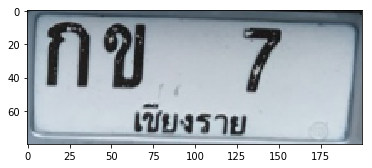

In [297]:
x = cv.imread('./cars/positive/S_8167620536848_024.jpg')
x = cv.resize(x,(200,80))
plt.imshow(x)

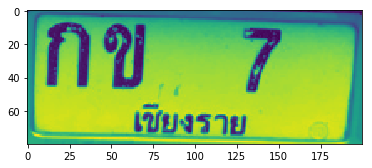

In [298]:
gray = cv.cvtColor(x,cv.COLOR_BGR2GRAY)
plt.imshow(gray)

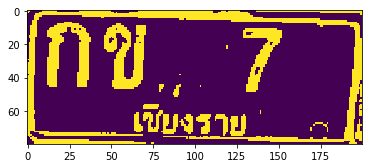

In [299]:
adaptive = cv.adaptiveThreshold(gray,
                                 255,
                                 cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv.THRESH_BINARY_INV,
                                31,5)
# ret,adaptive = cv.threshold(gray,150,255, cv.THRESH_BINARY)
plt.imshow(adaptive)

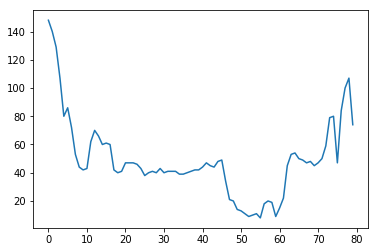

In [300]:
adaptive1 = adaptive/255
hist = adaptive1.sum(1)
plt.plot(hist)

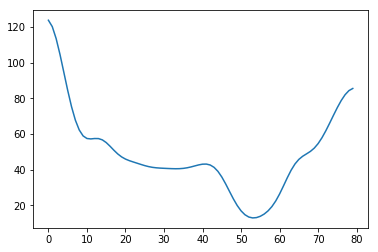

In [301]:
hist2 = gaussian_filter1d(hist,3)
plt.plot(hist2)
minHist = np.argmin(hist2)

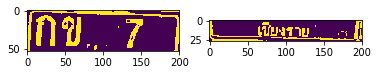

In [302]:
plt.subplot(1,2,1)
plt.imshow(adaptive[:minHist,:])
plt.subplot(1,2,2)
plt.imshow(adaptive[minHist:,:])

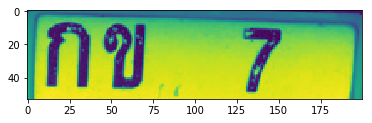

In [303]:
im1 = np.copy(gray[:minHist,:])
im2 = np.copy(gray[minHist:,:])
plt.imshow(im1)

In [304]:
pytesseract.image_to_string(im1, lang='tha+eng', boxes=False,
                            config='--psm 10 --oem 1')

'ny 7 |'

In [305]:
pytesseract.image_to_string(im2, lang='tha+eng', boxes=False,
                            config='--psm 10 --oem 1')

'1 เขชียงรย'

In [306]:
pytesseract.image_to_string(x, lang='tha+eng', \
        config='--psm 13 --oem 1')

'กป 7”'

In [307]:
im1 = np.copy(adaptive[:minHist,:]) 
im2 = np.copy(adaptive[minHist:,:])

In [308]:
labels,num = ndimage.label(im1)

In [309]:
labels,num

(array([[1, 1, 0, ..., 3, 3, 3],
        [1, 0, 0, ..., 3, 3, 3],
        [0, 0, 0, ..., 0, 0, 3],
        ...,
        [2, 2, 2, ..., 0, 0, 2],
        [2, 2, 2, ..., 0, 0, 2],
        [2, 2, 2, ..., 0, 0, 0]]), 11)

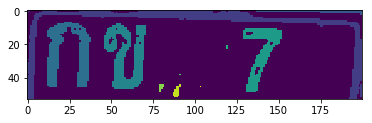

In [310]:
plt.imshow(labels)

In [311]:
objs = ndimage.find_objects(labels,num)

In [312]:
objs

[(slice(0, 2, None), slice(0, 2, None)),
 (slice(0, 53, None), slice(0, 200, None)),
 (slice(0, 3, None), slice(137, 200, None)),
 (slice(7, 46, None), slice(12, 38, None)),
 (slice(8, 47, None), slice(46, 71, None)),
 (slice(11, 49, None), slice(129, 152, None)),
 (slice(21, 23, None), slice(119, 120, None)),
 (slice(38, 39, None), slice(91, 92, None)),
 (slice(44, 49, None), slice(79, 82, None)),
 (slice(44, 52, None), slice(87, 92, None)),
 (slice(45, 46, None), slice(103, 104, None))]

In [313]:
j = 0
for i in objs :
    j+=1
    if labels[i].size <25 or labels[i].size > 1500 :
        for x in range(len(labels[i])) :
            for y in range (len(labels[i][x])) :
                if(labels[i][x][y] == j) :
                    labels[i][x][y] = 0
        

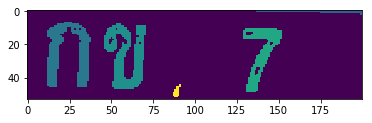

In [314]:
plt.imshow(labels)

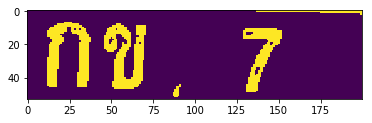

In [315]:
for i in range(len(labels)) :
    for j in range(len(labels[i])) :
        if labels[i][j] != 0 :
            labels[i][j] = 255
plt.imshow(labels)

In [318]:
pytesseract.image_to_string(labels, lang='tha+eng', boxes=False,
                            config='--psm 10 --oem 1')

'กช 7'